# Mini Proyecto #1:

### Librerias y Dataset

In [102]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


In [103]:
#Conjunto de datos 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
df = pd.concat([predict_students_dropout_and_academic_success.data.features, predict_students_dropout_and_academic_success.data.targets], axis=1)

## 2. Procesamiento de los datos

In [104]:
# Cargar el dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features
y = dataset.data.targets

# Unir X e y para fácil manejo
df = pd.concat([X, y], axis=1)

# Revisar los valores únicos de la variable objetivo
print(df['Target'].value_counts())

# Crear variable binaria: 1 = Desertó, 0 = No desertó (Graduado o En Curso)
df['Target_Binary'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Verificar distribución
print(df['Target_Binary'].value_counts())
df.head()


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Target_Binary
0    3003
1    1421
Name: count, dtype: int64


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Binary
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


## 3. División de Datos (*train_test_split*)

In [105]:
#Separar variables de entrenamiento y de prueba

# Eliminar columnas no numéricas si es necesario, o codificarlas
X = df.drop(columns=['Target', 'Target_Binary'])  # sin variable objetivo
y = df['Target_Binary']

# Convertir variables categóricas a dummies (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

#Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [106]:
# Revisar distribución de clases en el conjunto completo
print("Distribución total:")
print(y.value_counts(normalize=True))

# En entrenamiento
print("\nDistribución en entrenamiento:")
print(y_train.value_counts(normalize=True))

# En prueba
print("\nDistribución en prueba:")
print(y_test.value_counts(normalize=True))

#Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Distribución total:
Target_Binary
0    0.678797
1    0.321203
Name: proportion, dtype: float64

Distribución en entrenamiento:
Target_Binary
0    0.678941
1    0.321059
Name: proportion, dtype: float64

Distribución en prueba:
Target_Binary
0    0.678464
1    0.321536
Name: proportion, dtype: float64


## 4. Entrenamiento del Modelo de Clasificación

### 4.1 Entrenamiento Manual y Prueba del Modelo con *k* = {3, 5, 7, 9, 11}

In [107]:
# Entrenar el modelo para k=3

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Precisión en ambos conjuntos
print("Train set accuracy: {:.4f}".format(knn.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.4f}".format(knn.score(X_test_scaled, y_test)))

# Evaluar el modelo
y_pred = knn.predict(X_test_scaled)

Train set accuracy: 0.8957
Test set accuracy: 0.8336


In [108]:
# Entrenar el modelo para k=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Precisión en ambos conjuntos
print("Train set accuracy: {:.4f}".format(knn.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.4f}".format(knn.score(X_test_scaled, y_test)))

# Evaluar el modelo
y_pred = knn.predict(X_test_scaled)

Train set accuracy: 0.8744
Test set accuracy: 0.8411


In [109]:
# Entrenar el modelo para k=7

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

# Precisión en ambos conjuntos
print("Train set accuracy: {:.4f}".format(knn.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.4f}".format(knn.score(X_test_scaled, y_test)))

# Evaluar el modelo
y_pred = knn.predict(X_test_scaled)

Train set accuracy: 0.8666
Test set accuracy: 0.8404


In [110]:
# Entrenar el modelo para k=9

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

# Precisión en ambos conjuntos
print("Train set accuracy: {:.4f}".format(knn.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.4f}".format(knn.score(X_test_scaled, y_test)))

# Evaluar el modelo
y_pred = knn.predict(X_test_scaled)

Train set accuracy: 0.8556
Test set accuracy: 0.8351


In [111]:
# Entrenar el modelo para k=11

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)

# Precisión en ambos conjuntos
print("Train set accuracy: {:.4f}".format(knn.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.4f}".format(knn.score(X_test_scaled, y_test)))

# Evaluar el modelo
y_pred = knn.predict(X_test_scaled)

Train set accuracy: 0.8527
Test set accuracy: 0.8381


### 4.2. Matriz de Confusión y Métricas

In [112]:
# Matriz de confusión y métricas (solo conjunto de prueba) k=3
print("\nMatriz de confusión (Test set), k=3:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Estimar probabilidad de deserción
y_proba = knn.predict_proba(X_test_scaled)[:, 1]  # probabilidad de clase 1 (desertó)
print("\nPrimeras 5 probabilidades de deserción:")
print(y_proba[:5])

# Matriz de confusión y métricas (solo conjunto de prueba) k=5
print("\nMatriz de confusión (Test set), k=5:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Estimar probabilidad de deserción
y_proba = knn.predict_proba(X_test_scaled)[:, 1]  # probabilidad de clase 1 (desertó)
print("\nPrimeras 5 probabilidades de deserción:")
print(y_proba[:5])

# Matriz de confusión y métricas (solo conjunto de prueba) k=7
print("\nMatriz de confusión (Test set), k=7:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Estimar probabilidad de deserción
y_proba = knn.predict_proba(X_test_scaled)[:, 1]  # probabilidad de clase 1 (desertó)
print("\nPrimeras 5 probabilidades de deserción:")
print(y_proba[:5])

# Matriz de confusión y métricas (solo conjunto de prueba)  k=9
print("\nMatriz de confusión (Test set), k=9:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Estimar probabilidad de deserción
y_proba = knn.predict_proba(X_test_scaled)[:, 1]  # probabilidad de clase 1 (desertó)
print("\nPrimeras 5 probabilidades de deserción:")
print(y_proba[:5])

# Matriz de confusión y métricas (solo conjunto de prueba) k=11
print("\nMatriz de confusión (Test set), k=11:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Estimar probabilidad de deserción
y_proba = knn.predict_proba(X_test_scaled)[:, 1]  # probabilidad de clase 1 (desertó)
print("\nPrimeras 5 probabilidades de deserción:")
print(y_proba[:5])


Matriz de confusión (Test set), k=3:
[[867  34]
 [181 246]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       901
           1       0.88      0.58      0.70       427

    accuracy                           0.84      1328
   macro avg       0.85      0.77      0.79      1328
weighted avg       0.84      0.84      0.83      1328


Primeras 5 probabilidades de deserción:
[0.36363636 0.90909091 0.36363636 0.18181818 0.18181818]

Matriz de confusión (Test set), k=5:
[[867  34]
 [181 246]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       901
           1       0.88      0.58      0.70       427

    accuracy                           0.84      1328
   macro avg       0.85      0.77      0.79      1328
weighted avg       0.84      0.84      0.83      1328


Primeras 5 probabilidades de deserción:
[0.36363636 0.90909091 0.363636

### 4.3. Entrenamiento y Pruebas Semiautomatizado (Bucle *for*)

In [ ]:
#Evaluando k=1,2,...,20

print("\nEvaluando diferentes valores de k...\n")

best_test_accuracy = 0
best_k = 0
train_accuracy_list = []
test_accuracy_list = []

for k in range(1, 21):  # Probar k de 1 a 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)  # usar datos escalados
    
    # Predicciones para entrenamiento y prueba
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    # Calcular precisiones
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Guardar en listas
    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)
    
    # Imprimir ambas precisiones
    print(f"k={k:2}: Train Accuracy={train_acc:.6f}, Test Accuracy={test_acc:.6f}, Diferencia={train_acc-test_acc:.6f}")
    
    # Encontrar el mejor k basado en precisión de prueba
    if test_acc > best_test_accuracy:
        best_test_accuracy = test_acc
        best_k = k

print(f"\nMejor k: {best_k}")
print(f"Train Accuracy: {train_accuracy_list[best_k-1]:.4f}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Diferencia: {train_accuracy_list[best_k-1] - best_test_accuracy:.4f}")

# Mantener compatibility con tu código anterior
accuracy_list = test_accuracy_list  # Para que funcione con código posterior



Evaluando diferentes valores de k...

k= 1: Train Accuracy=1.000000, Test Accuracy=0.807982, Diferencia=0.192018
k= 2: Train Accuracy=0.878553, Test Accuracy=0.814006, Diferencia=0.064547
k= 3: Train Accuracy=0.895672, Test Accuracy=0.833584, Diferencia=0.062087
k= 4: Train Accuracy=0.864987, Test Accuracy=0.836596, Diferencia=0.028391
k= 5: Train Accuracy=0.874354, Test Accuracy=0.841114, Diferencia=0.033240
k= 6: Train Accuracy=0.859173, Test Accuracy=0.838102, Diferencia=0.021071
k= 7: Train Accuracy=0.866602, Test Accuracy=0.840361, Diferencia=0.026241
k= 8: Train Accuracy=0.851421, Test Accuracy=0.834337, Diferencia=0.017084
k= 9: Train Accuracy=0.855620, Test Accuracy=0.835090, Diferencia=0.020530
k=10: Train Accuracy=0.845284, Test Accuracy=0.833584, Diferencia=0.011700
k=11: Train Accuracy=0.852713, Test Accuracy=0.838102, Diferencia=0.014611
k=12: Train Accuracy=0.843023, Test Accuracy=0.833584, Diferencia=0.009439
k=13: Train Accuracy=0.847868, Test Accuracy=0.837349, Difere

### 4.4. Gráfico ROC y AUC

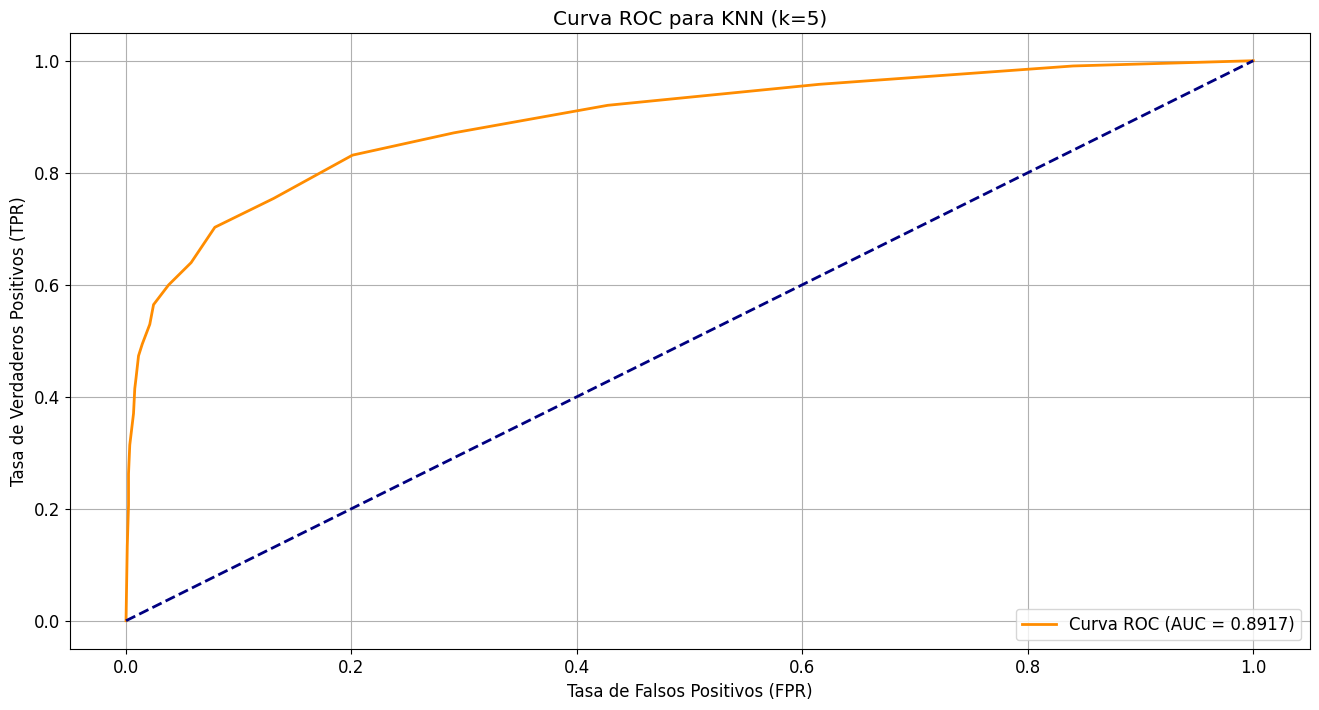

In [114]:
#Gráficos ROC y AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener probabilidades para la clase positiva (desertó = 1)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Calcular FPR, TPR y thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular AUC
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para KNN (k=5)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


De la figura () se evidencia que el modelo KNN presenta un alto rendimiento con un AUC de 0.8917, significativamente superior al clasificador aleatorio (AUC = 0.5). Este valor indica una alta capacidad del modelo para distinguir entre las diferentes clases del problema. En lo referente a la interpretación técnica, es muy claro el óptimo desempeño del modelo con una curva considerablemente alejada de la línea diagonal (clasificador aleatorio), manteniéndose en la región superior izquierda del espacio ROC. Esto sugiere que el modelo tiene una excelente capacidad predictiva y puede ser considerado como una herramienta confiable para la clasificación.

### 4.5. Gráfico de Precisión vs Número de Vecinos (*k*)

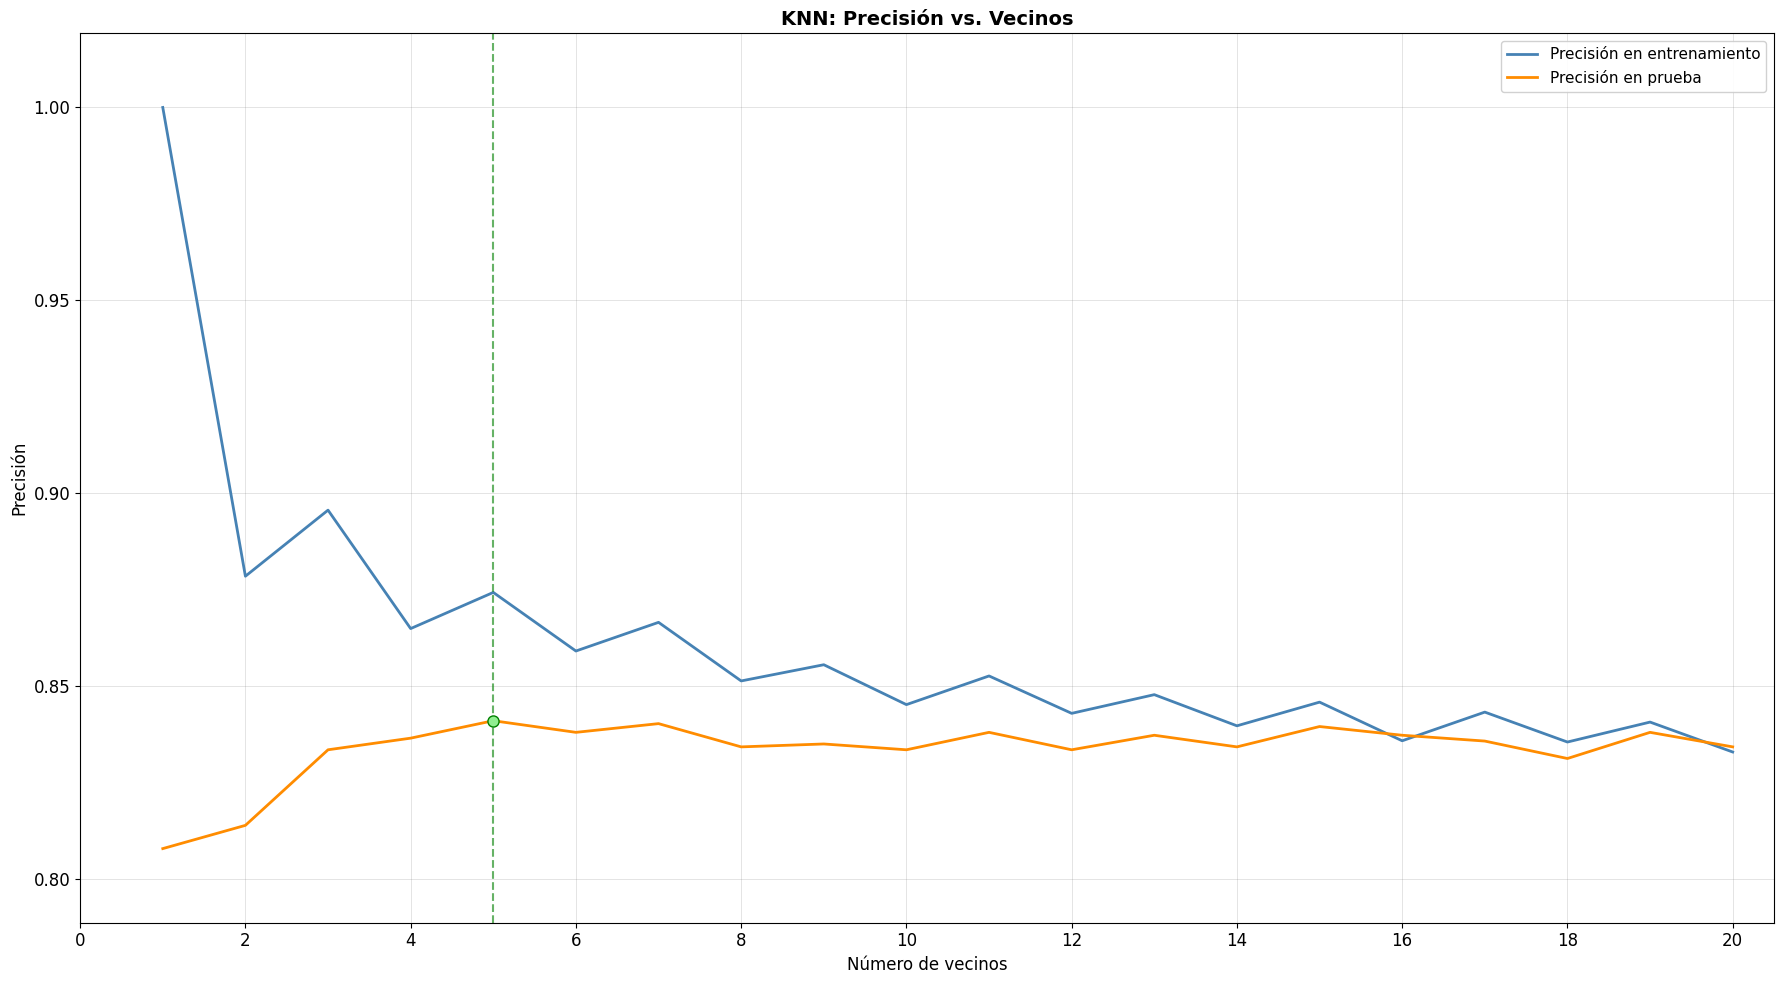

In [115]:
import matplotlib.pyplot as plt

# Crear el gráfico de precisión vs vecinos
plt.figure(figsize=(18, 10))
plt.rcParams.update({'font.size': 12})

k_values = range(1, 21)

# Graficar las líneas
plt.plot(k_values, train_accuracy_list, color='steelblue', linewidth=2, label='Precisión en entrenamiento')
plt.plot(k_values, test_accuracy_list, color='darkorange', linewidth=2, label='Precisión en prueba')

# Ajustar límites
min_acc = min(min(train_accuracy_list), min(test_accuracy_list))
max_acc = max(max(train_accuracy_list), max(test_accuracy_list))
margin = (max_acc - min_acc) * 0.1
plt.ylim(min_acc - margin, max_acc + margin)
plt.xlim(0.5, 20.5)

# Etiquetas y título
plt.xlabel('Número de vecinos', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.title('KNN: Precisión vs. Vecinos', fontsize=14, fontweight='bold')

# Configurar ticks
plt.xticks(range(0, 21, 2))

# Agregar grid y leyenda
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, color='gray')
plt.legend(fontsize=11, loc='upper right', framealpha=0.9)

# Marcar mejor k
plt.axvline(x=best_k, color='green', linestyle='--', alpha=0.6, linewidth=1.5)
plt.plot(best_k, test_accuracy_list[best_k-1], 'go', markersize=8, markerfacecolor='lightgreen', markeredgecolor='green')

plt.tight_layout()
plt.show()


En el gráfico de la figura (), el comportamiento de la precisión en entrenamiento (representado en azul), muestra el patrón típico de sobreajuste en KNN, iniciando con un score en 1.0 (perfecto) con k=1 y decreciendo conforme aumenta el número de vecinos. Esta caída es esperada porque con k=1 el modelo memoriza perfectamente los datos de entrenamiento, pero conforme k aumenta, el modelo se vuelve más conservador y la precisión en entrenamiento naturalmente disminuye. Después de k=5, la precisión se estabiliza alrededor de 0.84-0.85. De manera análoga, el comportamiento de de la exactitud/precisión en test presenta un comportamiento más estable y realista, iniciando alrededor de 0.81 y mejorando progresivamente hasta alcanzar su máximo cerca de k=5 (marcado con la línea vertical verde). A partir de este punto, la precisión se mantiene relativamente constante alrededor de 0.83, con pequeñas variaciones. Esta estabilidad indica que el modelo generaliza bien con k=5 o valores superiores, siendo k=5 el punto óptimo donde se maximiza la precisión en datos no vistos mientras se mantiene un buen balance con el rendimiento en entrenamiento.

## 5. Modelo de Regresión Mediante *KNeighborsRegressor*

### 5.1. Análisis Exploratorio de los datos (Variable Promedio_final)

In [116]:
# Renombrar para simplificar
df = df.rename(columns={
    'Curricular units 1st sem (grade)': 'nota_1sem',
    'Curricular units 2nd sem (grade)': 'nota_2sem'
})
# Crear columna del promedio final
df['promedio_final'] = df[['nota_1sem', 'nota_2sem']].mean(axis=1)


In [117]:
# Estadísticas básicas
print(df[['nota_1sem', 'nota_2sem', 'promedio_final']].describe())


         nota_1sem    nota_2sem  promedio_final
count  4424.000000  4424.000000     4424.000000
mean     10.640822    10.230206       10.435514
std       4.843663     5.210808        4.818530
min       0.000000     0.000000        0.000000
25%      11.000000    10.750000       11.000000
50%      12.285714    12.200000       12.250000
75%      13.400000    13.333333       13.266667
max      18.875000    18.571429       18.283654


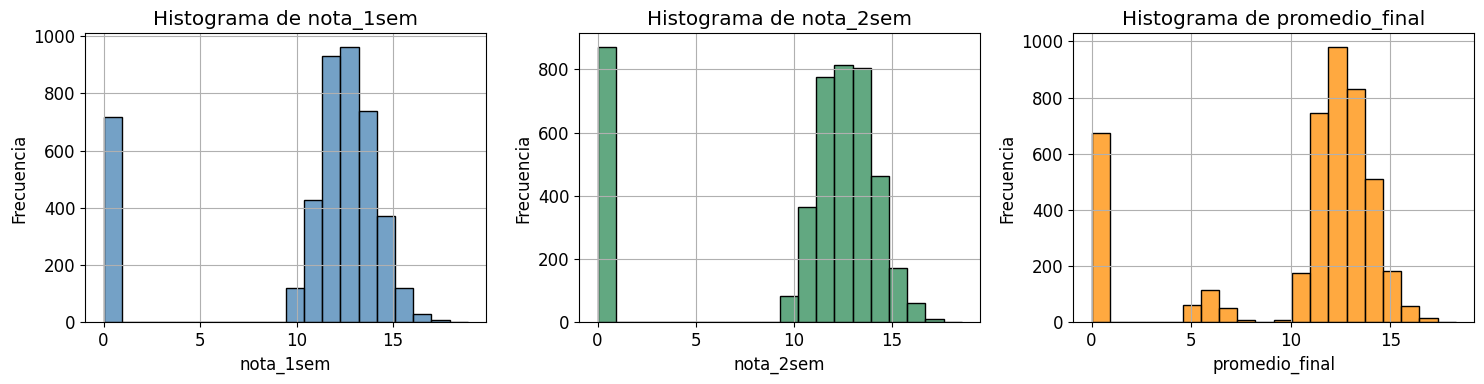

In [118]:
# Histograma entre las variables
colores = ['steelblue', 'seagreen', 'darkorange']
variables = ['nota_1sem', 'nota_2sem', 'promedio_final']

# Crear figura con 3 subgráficos en una fila
plt.figure(figsize=(15, 4))

for i, (var, color) in enumerate(zip(variables, colores)):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[var], bins=20, color=color, kde=False)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()
plt.show()


Sobre los histogramas de la figura (), se puede establecer que en lo concerniente a las calificaciones del primer semestre la distribución evidencia una marcada bimodalidad con dos concentraciones principales: una en el rango bajo (0-2) con una alta frecuencia (~700 estudiantes) y otra en el rango alto (10-14) alcanzando el mayor pico (~950 estudiantes). Se observa una escasa presencia de estudiantes en la zona intermedia (3-9), lo que sugiere una temprana polarización en el rendimiento académico.

Con respecto a las notas del segundo semestre (centro), el histograma revela una menor dispersión y se concentra principalmente en el rango 11-13 (~800 estudiantes). Asimismo, se aprecia una reducción considerable en el número de estudiantes en el rango bajo (0-2) respecto al primer semestre, lo que podría indicar una mejora generalizada del rendimiento o la no continuidad de quienes obtuvieron bajos resultados inicialmente.

Finalmente, el promedio acumulado exhibe una tendencia hacia un patrón más cercano a la normalidad, centrado en el rango 12-14, con un pico máximo de ~1000 estudiantes. Aunque persiste un grupo en el rango bajo (0-2), este es mucho menor que en el primer semestre.

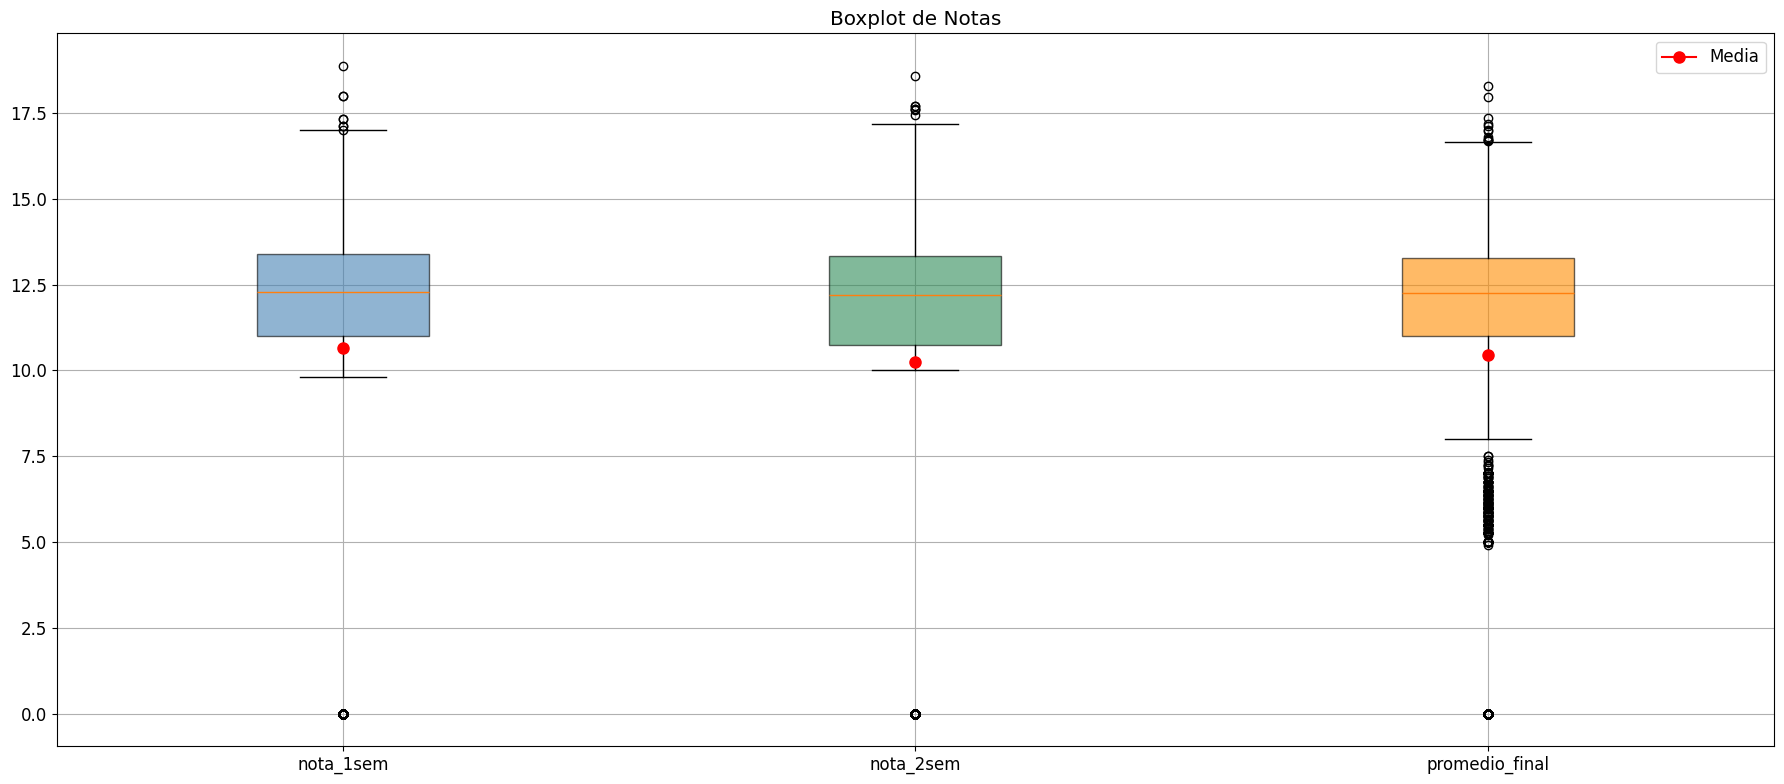

In [119]:
#Diagrama de cajas y Bigotes
variables_notas = ['nota_1sem', 'nota_2sem', 'promedio_final']
colores = ['steelblue', 'seagreen', 'darkorange']

# Calcular medias
medias = df[variables_notas].mean().values

# Crear boxplot con matplotlib para aplicar colores personalizados
fig, ax = plt.subplots(figsize=(18, 8))
box = ax.boxplot([df[var].dropna() for var in variables_notas], patch_artist=True)

# Aplicar colores personalizados a cada caja
for patch, color in zip(box['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

# Añadir puntos rojos para las medias
for i, media in enumerate(medias):
    ax.plot(i + 1, media, marker='o', color='red', markersize=8, label='Media' if i == 0 else "")

# Personalización del gráfico
ax.set_xticklabels(variables_notas)
plt.title('Boxplot de Notas')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

El gráfico () permite visualizar cómo se distribuyen las notas en ambos semestres y en el promedio final. En general, las tres variables reflejan una tendencia similar, con concentraciones de datos alrededor de valores centrales similares.

La presencia de valores extremos, especialmente en el promedio final, indica la existencia de estudiantes con desempeños significativamente distintos al grupo. Por otro lado, la cercanía entre la media y la mediana en todas las variables sugiere que las notas no están fuertemente sesgadas, mostrando una distribución razonablemente equilibrada.

### 5.2. División de los Datos (*train_test_split*)

In [120]:
#Seperar los datos de entrenamiento y prueba

# Variable objetivo
y = df['promedio_final']

# Variables predictoras (eliminamos las notas y la variable Target de clasificación)
X = df.drop(columns=[
    'nota_1sem', 
    'nota_2sem', 
    'promedio_final',
    'Target'  # esta es clasificación
])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamiento (muy importante para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [121]:
# Total de datos de entrenamiento y de prueba
print("Tamaño total:", len(df))
print("Tamaño entrenamiento:", len(X_train))
print("Tamaño prueba:", len(X_test))


Tamaño total: 4424
Tamaño entrenamiento: 3096
Tamaño prueba: 1328


### 5.3. Entrenamiento Manual y Prueba con *k* = {3, 5, 7, 9, 11}

In [122]:
# Define el valor de k
k = 3  

# Entrenar modelo
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predicciones en entrenamiento
y_train_pred = knn.predict(X_train_scaled)

# Predicciones en prueba
y_test_pred = knn.predict(X_test_scaled)

# --- MÉTRICAS ---

# Entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
evs_train = explained_variance_score(y_train, y_train_pred)

# Prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
evs_test = explained_variance_score(y_test, y_test_pred)

# --- RESULTADOS ---
print(f"Resultados para k = {k}\n")
print(f"-Entrenamiento: ->  MAE:{mae_train:.2f} | RMSE:{rmse_train:.2f} | R²:{r2_train:.2f} | EVS:{evs_train:.2f}")
print(f"- Prueba:       ->  MAE:{mae_test:.2f} | RMSE:{rmse_test:.2f} | R²:{r2_test:.2f} | EVS:{evs_test:.2f}")

Resultados para k = 3

-Entrenamiento: ->  MAE:1.00 | RMSE:1.68 | R²:0.88 | EVS:0.88
- Prueba:       ->  MAE:1.56 | RMSE:2.69 | R²:0.69 | EVS:0.70


In [123]:
# Define el valor de k
k = 5  

# Entrenar modelo
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predicciones en entrenamiento
y_train_pred = knn.predict(X_train_scaled)

# Predicciones en prueba
y_test_pred = knn.predict(X_test_scaled)

# --- MÉTRICAS ---

# Entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
evs_train = explained_variance_score(y_train, y_train_pred)

# Prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
evs_test = explained_variance_score(y_test, y_test_pred)

# --- RESULTADOS ---
print(f"Resultados para k = {k}\n")

print(f"-Entrenamiento: ->  MAE:{mae_train:.2f} | RMSE:{rmse_train:.2f} | R²:{r2_train:.2f} | EVS:{evs_train:.2f}")
print(f"- Prueba:       ->  MAE:{mae_test:.2f} | RMSE:{rmse_test:.2f} | R²:{r2_test:.2f} | EVS:{evs_test:.2f}")

Resultados para k = 5

-Entrenamiento: ->  MAE:1.16 | RMSE:1.88 | R²:0.85 | EVS:0.85
- Prueba:       ->  MAE:1.54 | RMSE:2.58 | R²:0.72 | EVS:0.72


In [124]:
# Define el valor de k
k = 7  

# Entrenar modelo
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predicciones en entrenamiento
y_train_pred = knn.predict(X_train_scaled)

# Predicciones en prueba
y_test_pred = knn.predict(X_test_scaled)

# --- MÉTRICAS ---

# Entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
evs_train = explained_variance_score(y_train, y_train_pred)

# Prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
evs_test = explained_variance_score(y_test, y_test_pred)

# --- RESULTADOS ---
print(f"Resultados para k = {k}\n")
print(f"-Entrenamiento: ->  MAE:{mae_train:.2f} | RMSE:{rmse_train:.2f} | R²:{r2_train:.2f} | EVS:{evs_train:.2f}")
print(f"- Prueba:       ->  MAE:{mae_test:.2f} | RMSE:{rmse_test:.2f} | R²:{r2_test:.2f} | EVS:{evs_test:.2f}")

Resultados para k = 7

-Entrenamiento: ->  MAE:1.21 | RMSE:1.97 | R²:0.83 | EVS:0.83
- Prueba:       ->  MAE:1.53 | RMSE:2.52 | R²:0.73 | EVS:0.74


In [125]:
# Define el valor de k
k = 9  

# Entrenar modelo
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predicciones en entrenamiento
y_train_pred = knn.predict(X_train_scaled)

# Predicciones en prueba
y_test_pred = knn.predict(X_test_scaled)

# --- MÉTRICAS ---

# Entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
evs_train = explained_variance_score(y_train, y_train_pred)

# Prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
evs_test = explained_variance_score(y_test, y_test_pred)

# --- RESULTADOS ---
print(f"Resultados para k = {k}\n")

print(f"-Entrenamiento: ->  MAE:{mae_train:.2f} | RMSE:{rmse_train:.2f} | R²:{r2_train:.2f} | EVS:{evs_train:.2f}")
print(f"- Prueba:       ->  MAE:{mae_test:.2f} | RMSE:{rmse_test:.2f} | R²:{r2_test:.2f} | EVS:{evs_test:.2f}")

Resultados para k = 9

-Entrenamiento: ->  MAE:1.27 | RMSE:2.03 | R²:0.82 | EVS:0.82
- Prueba:       ->  MAE:1.54 | RMSE:2.50 | R²:0.73 | EVS:0.74


In [126]:
# Define el valor de k
k = 11  

# Entrenar modelo
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predicciones en entrenamiento
y_train_pred = knn.predict(X_train_scaled)

# Predicciones en prueba
y_test_pred = knn.predict(X_test_scaled)

# --- MÉTRICAS ---

# Entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
evs_train = explained_variance_score(y_train, y_train_pred)

# Prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
evs_test = explained_variance_score(y_test, y_test_pred)

# --- RESULTADOS ---
print(f"Resultados para k = {k}\n")

print(f"-Entrenamiento: ->  MAE:{mae_train:.2f} | RMSE:{rmse_train:.2f} | R²:{r2_train:.2f} | EVS:{evs_train:.2f}")
print(f"- Prueba:       ->  MAE:{mae_test:.2f} | RMSE:{rmse_test:.2f} | R²:{r2_test:.2f} | EVS:{evs_test:.2f}")

Resultados para k = 11

-Entrenamiento: ->  MAE:1.30 | RMSE:2.08 | R²:0.81 | EVS:0.81
- Prueba:       ->  MAE:1.53 | RMSE:2.47 | R²:0.74 | EVS:0.75


### 5.4. Entrenamiento Semiautomatizado y Pruebas (Bucle *for*)

In [127]:
# Lista de k desde 1 hasta 20
k_values = range(1, 21)

# Almacenar resultados
resultados = []

for k in k_values:
    # Entrenar modelo
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    # Métricas
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    r2_train = r2_score(y_train, y_train_pred)
    evs_train = explained_variance_score(y_train, y_train_pred)
    
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
    r2_test = r2_score(y_test, y_test_pred)
    evs_test = explained_variance_score(y_test, y_test_pred)
    
    # Guardar resultados
    resultados.append({
        'k': k,
        'MAE_Train': mae_train,
        'RMSE_Train': rmse_train,
        'R2_Train': r2_train,
        'EVS_Train': evs_train,
        'MAE_Test': mae_test,
        'RMSE_Test': rmse_test,
        'R2_Test': r2_test,
        'EVS_Test': evs_test
    })
    
    print(f" k={k} | MAE Test: {mae_test:.4f} | RMSE Test: {rmse_test:.4f} | R² Test: {r2_test:.4f} | EVS Test: {evs_test:.4f}")

# Convertir a DataFrame
resultados_df = pd.DataFrame(resultados)

# Encontrar el índice del mejor k (menor RMSE en prueba)
mejor_idx = resultados_df['RMSE_Test'].idxmin()

# Extraer la fila correspondiente
mejor_fila = resultados_df.loc[[mejor_idx], ['k', 'MAE_Test', 'RMSE_Test', 'R2_Test', 'EVS_Test']]

# Renombrar columnas para presentación
mejor_fila.columns = ['Mejor k', 'MAE (Prueba)', 'RMSE (Prueba)', 'R² (Prueba)', 'EVS (Prueba)']

# Mostrar tabla
print("\nMejor modelo KNN (según menor RMSE en prueba):")
print(mejor_fila.to_string(index=False))

best_k_reg = int(mejor_fila['Mejor k'].iloc[0])


 k=1 | MAE Test: 1.7292 | RMSE Test: 3.1752 | R² Test: 0.5723 | EVS Test: 0.5743


 k=2 | MAE Test: 1.6008 | RMSE Test: 2.8209 | R² Test: 0.6624 | EVS Test: 0.6653
 k=3 | MAE Test: 1.5558 | RMSE Test: 2.6885 | R² Test: 0.6934 | EVS Test: 0.6963
 k=4 | MAE Test: 1.5314 | RMSE Test: 2.5980 | R² Test: 0.7136 | EVS Test: 0.7167
 k=5 | MAE Test: 1.5370 | RMSE Test: 2.5750 | R² Test: 0.7187 | EVS Test: 0.7225
 k=6 | MAE Test: 1.5386 | RMSE Test: 2.5536 | R² Test: 0.7233 | EVS Test: 0.7277
 k=7 | MAE Test: 1.5253 | RMSE Test: 2.5213 | R² Test: 0.7303 | EVS Test: 0.7353
 k=8 | MAE Test: 1.5412 | RMSE Test: 2.5176 | R² Test: 0.7311 | EVS Test: 0.7359
 k=9 | MAE Test: 1.5434 | RMSE Test: 2.5018 | R² Test: 0.7345 | EVS Test: 0.7395
 k=10 | MAE Test: 1.5247 | RMSE Test: 2.4639 | R² Test: 0.7424 | EVS Test: 0.7472
 k=11 | MAE Test: 1.5295 | RMSE Test: 2.4711 | R² Test: 0.7409 | EVS Test: 0.7457
 k=12 | MAE Test: 1.5301 | RMSE Test: 2.4693 | R² Test: 0.7413 | EVS Test: 0.7461
 k=13 | MAE Test: 1.5402 | RMSE Test: 2.4867 | R² Test: 0.7377 | EVS Test: 0.7430
 k=14 | MAE Test: 1.5590

### 5.5. Gráfico de Impacto de *k* en el Performance del Modelo

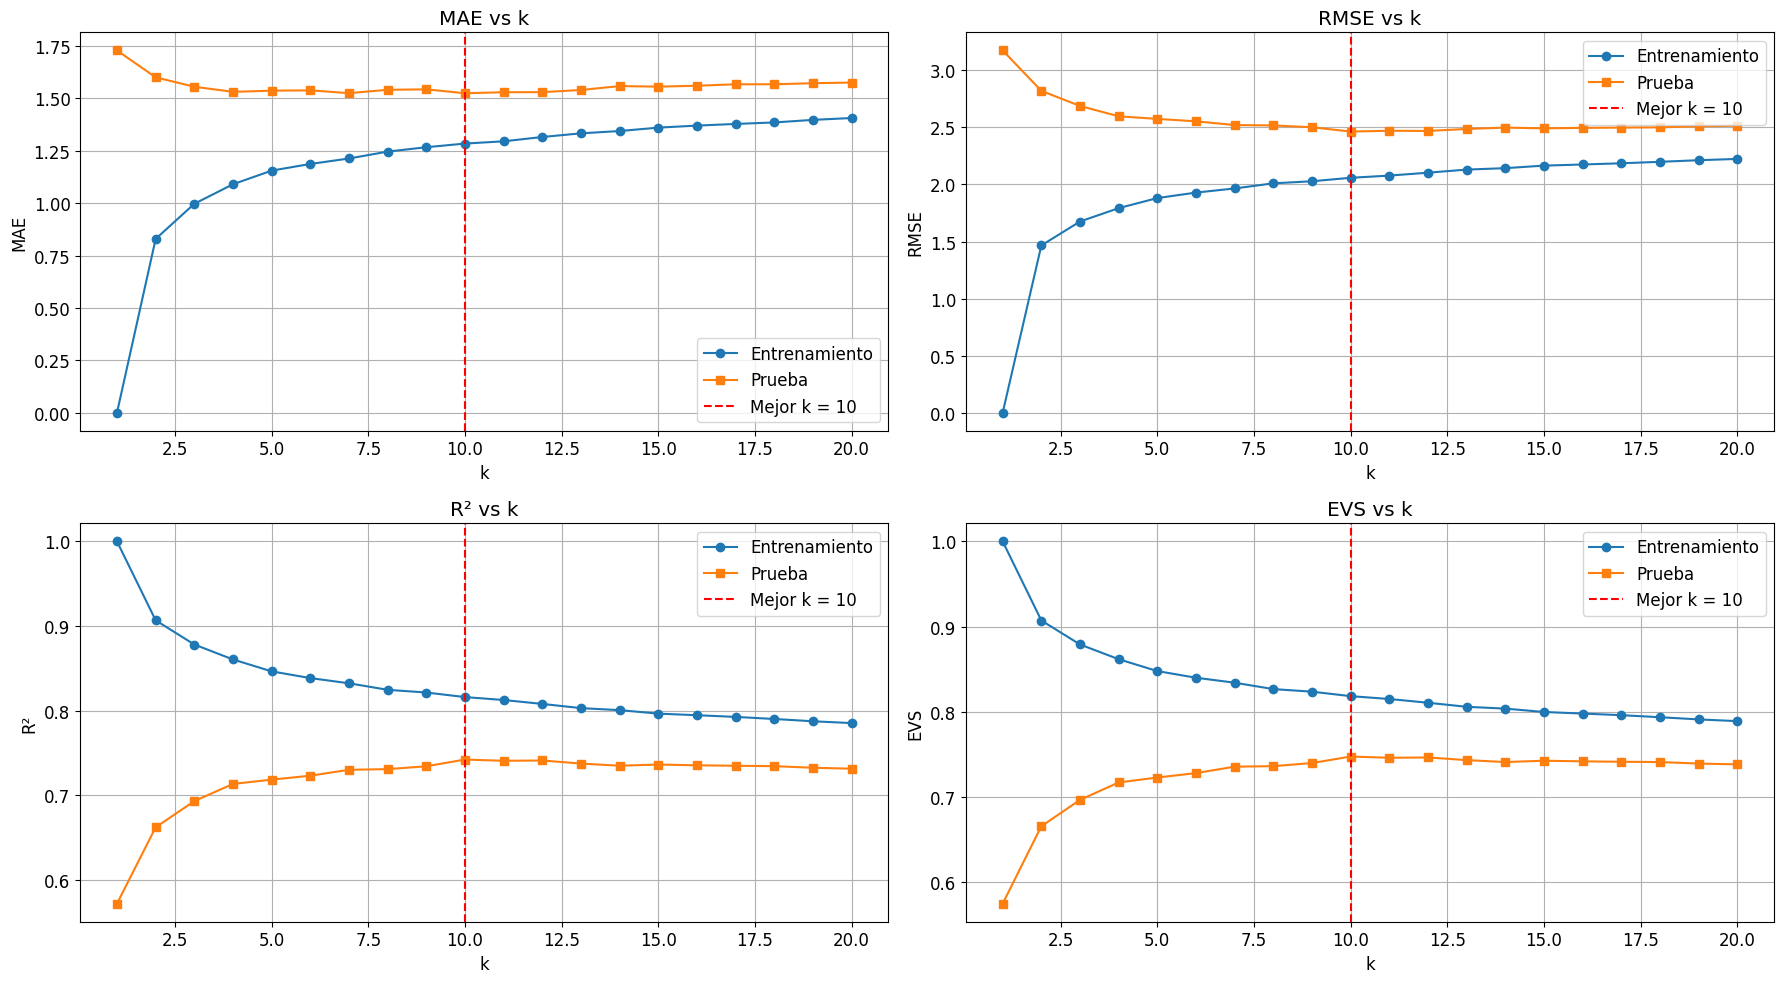

In [128]:
#Gráfico de impacto
mejor_k = best_k_reg  # Valor óptimo de k

plt.figure(figsize=(18, 10))

# MAE
plt.subplot(2, 2, 1)
plt.plot(resultados_df['k'], resultados_df['MAE_Train'], label='Entrenamiento', marker='o')
plt.plot(resultados_df['k'], resultados_df['MAE_Test'], label='Prueba', marker='s')
plt.axvline(x=mejor_k, color='red', linestyle='--', label=f'Mejor k = {mejor_k}')
plt.title('MAE vs k')
plt.xlabel('k')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# RMSE
plt.subplot(2, 2, 2)
plt.plot(resultados_df['k'], resultados_df['RMSE_Train'], label='Entrenamiento', marker='o')
plt.plot(resultados_df['k'], resultados_df['RMSE_Test'], label='Prueba', marker='s')
plt.axvline(x=mejor_k, color='red', linestyle='--', label=f'Mejor k = {mejor_k}')
plt.title('RMSE vs k')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# R²
plt.subplot(2, 2, 3)
plt.plot(resultados_df['k'], resultados_df['R2_Train'], label='Entrenamiento', marker='o')
plt.plot(resultados_df['k'], resultados_df['R2_Test'], label='Prueba', marker='s')
plt.axvline(x=mejor_k, color='red', linestyle='--', label=f'Mejor k = {mejor_k}')
plt.title('R² vs k')
plt.xlabel('k')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

# EVS
plt.subplot(2, 2, 4)
plt.plot(resultados_df['k'], resultados_df['EVS_Train'], label='Entrenamiento', marker='o')
plt.plot(resultados_df['k'], resultados_df['EVS_Test'], label='Prueba', marker='s')
plt.axvline(x=mejor_k, color='red', linestyle='--', label=f'Mejor k = {mejor_k}')
plt.title('EVS vs k')
plt.xlabel('k')
plt.ylabel('EVS')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


En los gráficos de MAE y RSME de la imagen () se observa cómo varía el error del modelo KNN al cambiar el número de vecinos. Cuando se usa un k pequeño, el modelo tiene un error muy bajo en entrenamiento, pero mayor en prueba, lo que indica sobreajuste (overfitting). A medida que k aumenta, el modelo mejora su capacidad de generalización, y el error en prueba alcanza su punto más bajo, a partir de la métrica RSME, cuando k = 10, siendo esta la mejor elección para el conjunto de datos. Superado ese valor, los errores tienden a estabilizarse o incluso aumentar ligeramente, lo cual sugiere una pérdida de precisión generando un subajuste (underfitting). Por otra parte, el gráfico de R² vs *k* muestra un patrón clásico de sobreajuste donde el R² de entrenamiento (línea azul) inicia en 1.0 (ajuste perfecto) y decrece consistentemente conforme aumenta k. Simultáneamente, el R² de prueba (línea naranja) presenta una mejora inicial hasta estabilizarse alrededor de k=10, punto óptimo identificado, donde ambas curvas convergen. Finalmente, la gráfica de EVS vs *k* replica el patrón observado en R², confirmando que k=10 representa el punto de equilibrio óptimo. La estabilización posterior a k=10 indica que incrementos adicionales en k no proporcionan mejoras significativas en la capacidad explicativa del modelo.

In [129]:
# Variación de MAE, RMSE y R² entre el mejor y el peor k
impacto_mae = resultados_df['MAE_Test'].max() - resultados_df['MAE_Test'].min()
impacto_rmse = resultados_df['RMSE_Test'].max() - resultados_df['RMSE_Test'].min()
impacto_r2 = resultados_df['R2_Test'].max() - resultados_df['R2_Test'].min()
impacto_evs = resultados_df['EVS_Test'].max() - resultados_df['EVS_Test'].min()
print("Impacto de k en el error de predicción (Test):")
print(f"- MAE: {impacto_mae:.4f}")
print(f"- RMSE: {impacto_rmse:.4f}")
print(f"- R²: {impacto_r2:.4f}")
print(f"- EVS²: {impacto_evs:.4f}")


Impacto de k en el error de predicción (Test):
- MAE: 0.2044
- RMSE: 0.7112
- R²: 0.1701
- EVS²: 0.1729


## 6. Informe final

### 6.1. Comparación de Modelos

En el análisis del dataset estudiantil mediante el método KNN, se aplicaron modelos tanto de clasificación como de regresión para abordar distintos objetivos. El modelo de *clasificación KNN, con un valor óptimo de **k = 5, se enfocó en predecir la deserción estudiantil (variable binaria), mostrando un buen equilibrio entre precisión y sensibilidad, lo cual lo hace útil para identificar estudiantes en riesgo. Por otro lado, el modelo de **regresión KNN, con **k = 10* como valor ideal, permitió estimar el rendimiento académico (promedio final), alcanzando un poder explicativo adecuado en datos de prueba (R² y EVS alrededor de 0.7424-0.7472). En ambos enfoques se evidenció que valores bajos de k provocan sobreajuste, mientras que valores altos pueden llevar a un modelo menos preciso. En conclusión, aunque ambos modelos son útiles en contextos distintos, el éxito de su aplicación depende críticamente de una adecuada selección del parámetro k.

### 6.2. El Mejor Modelo KNNeighbors Para Clasificación Y Regresión

En este estudio, se determinó que el valor óptimo de **k para KNN en clasificación fue 5**, mientras que para **regresión fue 12**. Esto refleja cómo el rendimiento del algoritmo puede variar según la naturaleza del problema: en clasificación, un k más pequeño puede capturar mejor las fronteras entre clases; mientras que en regresión, un k mayor ayuda a suavizar las predicciones y reducir la sensibilidad al ruido. Por tanto, la elección de k debe adaptarse al tipo de tarea y a la estructura de los datos.

### 6.3. Reflexión sobre Ventajas y Limitaciones de KNN en Contextos Reales

El algoritmo KNN destaca por ser fácil de entender y aplicar, lo que lo hace útil en situaciones prácticas donde no se conocen bien los patrones de los datos y no tiene presente la multicolinealidad en variables. Su flexibilidad para trabajar con tareas de clasificación o regresión lo vuelve versátil en distintos dominios. No obstante, este método también presenta debilidades: puede perder eficacia cuando se trabaja con grandes volúmenes de información o con variables que no aportan valor al modelo. Además, su desempeño disminuye en espacios con muchas dimensiones y es muy sensible a valores atípicos o datos ruidosos. Por ello, aunque es una técnica accesible, requiere una preparación adecuada de los datos para obtener buenos resultados.